In [1]:
%reload_ext autoreload
%autoreload 2
%run startup.py
from math import sin, cos

from pytplan.planner import SegmentList, Joint
from pytplan.plot import *
from testlib import *




In [2]:

j = Joint(10_000, 300_000)
joints = [j] * 2

sl = SegmentList(joints)

x = 10000

sl.move([x, x / 2])
sl.move([-x / 2, x])
sl.move([-x, -x / 2])
sl.move([x / 2, -x])

df = seg_step_df(sl)

stepper_plot(sl)


NameError: name 'seg_step' is not defined

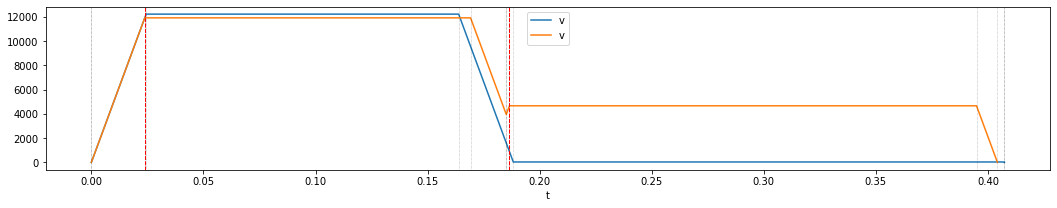

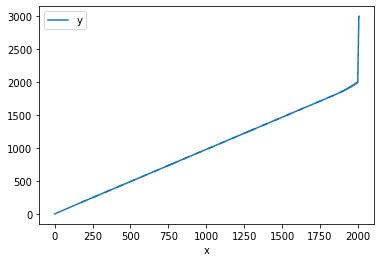

In [4]:


j = Joint(50_000, 500_000)
joints = [j] * 2

sl = SegmentList(joints)
x = 2000
sl.move([x, x])
sl.move([10, 1000])

sl.plot()
step_plot(sl)

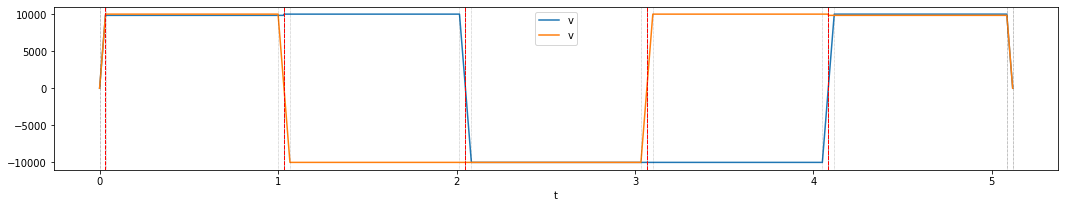

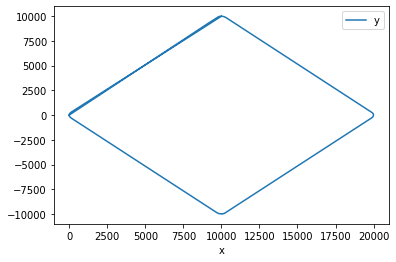

In [5]:
%reload_ext autoreload
%autoreload 2
%run startup.py

j = Joint(10_000, 300_000)
joints = [j] * 2

sl = SegmentList(joints)
x = 10000

sl.move([x, x])
sl.move([x, -x])
sl.move([-x, -x])
sl.move([-x, x])
sl.move([x, x])

sl.plot()
step_plot(sl)

In [6]:
%run startup.py

from pytplan.planner import SegmentList, Joint

j = Joint(10_000, 300_000)
joints = [j] * 2

sl = SegmentList(joints)
x = 10000

sl.move([5000, 100])
#sl.move([100, 10000])
#sl.move([-1000, 1])

print(sl)
df = seg_step_df(sl, details=True)

#stepper_plot(sl)

  0 0.0000 0.5340|[0        167 33   ↗9999     4667 467  ↘167    33        0] [0          0 1    ↗188       100 533  ↘0      1         0]



In [7]:
df

,seg,axis,ph,s,dr,pt,tf,v,a,sl,pl,dl,dc,xc,xe,isdone
t,,,,,,,,,,,,,,,,
0.000004,0,0,1,0,1,0.000004,0.033403,0.000000,299341.320359,167,8350,1.000000,0.000008,0.000002,-0.000002,False
0.000004,0,1,1,0,0,0.000004,0.000000,0.000000,0.000000,-1,-1,1.000000,0.000008,0.000000,1.000000,False
0.000008,0,0,1,0,1,0.000008,0.033403,1.197365,299341.320359,167,8349,0.835167,0.000012,0.000010,-0.000010,False
0.000008,0,1,2,0,1,0.000004,0.531915,188.000000,0.000000,100,132978,0.005319,0.000016,0.000752,-0.000752,False
0.000012,0,0,1,0,1,0.000012,0.033403,2.394731,299341.320359,167,8348,0.417584,0.000016,0.000022,-0.000022,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.533368,0,1,3,0,0,0.000004,0.000000,188.000000,0.000000,0,-1,0.005319,0.000013,0.000752,-0.000752,True
0.533372,0,0,3,0,1,0.033404,0.033403,0.999900,-299341.320359,3,0,1.000100,0.003638,167.000000,-3.000000,False
0.533372,0,1,3,0,0,0.000004,0.000000,188.000000,0.000000,0,-1,0.005319,0.000013,0.000752,-0.000752,True


In [8]:
t =df.drop(df[df.sl == -1].index)
t = df[['axis','isdone']].set_index('axis',append=True).unstack()
t.columns = ['a0','a1']
t[t.a1==True]

,a0,a1
t,,
0.531920,False,True
0.531924,False,True
0.531928,False,True
0.531932,False,True
0.531936,False,True
...,...,...
0.533360,False,True
0.533364,False,True
0.533368,False,True


axis
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: sl, dtype: object

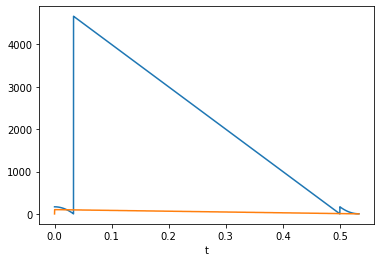

In [9]:
df['scs'] = df.groupby('axis').s.cumsum()
df.groupby('axis').sl.plot()

In [10]:
df

,seg,axis,ph,s,dr,pt,tf,v,a,sl,pl,dl,dc,xc,xe,isdone,scs
t,,,,,,,,,,,,,,,,,
0.000004,0,0,1,0,1,0.000004,0.033403,0.000000,299341.320359,167,8350,1.000000,0.000008,0.000002,-0.000002,False,0
0.000004,0,1,1,0,0,0.000004,0.000000,0.000000,0.000000,-1,-1,1.000000,0.000008,0.000000,1.000000,False,0
0.000008,0,0,1,0,1,0.000008,0.033403,1.197365,299341.320359,167,8349,0.835167,0.000012,0.000010,-0.000010,False,0
0.000008,0,1,2,0,1,0.000004,0.531915,188.000000,0.000000,100,132978,0.005319,0.000016,0.000752,-0.000752,False,0
0.000012,0,0,1,0,1,0.000012,0.033403,2.394731,299341.320359,167,8348,0.417584,0.000016,0.000022,-0.000022,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.533368,0,1,3,0,0,0.000004,0.000000,188.000000,0.000000,0,-1,0.005319,0.000013,0.000752,-0.000752,True,100
0.533372,0,0,3,0,1,0.033404,0.033403,0.999900,-299341.320359,3,0,1.000100,0.003638,167.000000,-3.000000,False,4998
0.533372,0,1,3,0,0,0.000004,0.000000,188.000000,0.000000,0,-1,0.005319,0.000013,0.000752,-0.000752,True,100


<AxesSubplot:xlabel='t'>

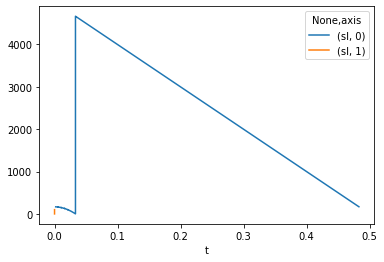

In [11]:
df[['axis','sl']].set_index('axis',append=True).drop_duplicates().unstack().plot()


axis
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: pl, dtype: object

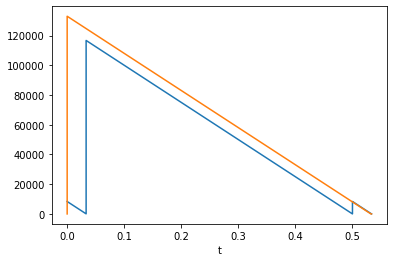

In [12]:
df.groupby('axis').pl.plot()

In [13]:
for s in sl:
    print(s.times)

[0.533362, 0.533958]


## R=2000 N=100 Tmean = 0.02629669801980198

N Discont,0,N Replans,5450,Errors,[]
Reductions,"[('V1A', 1186), ('V1B', 682), ('V0B', 50), ('V0A', 44)]",Replans,"[(8, 46), (6, 34), (4, 19), (0, 1)]",Time Err,0.0033


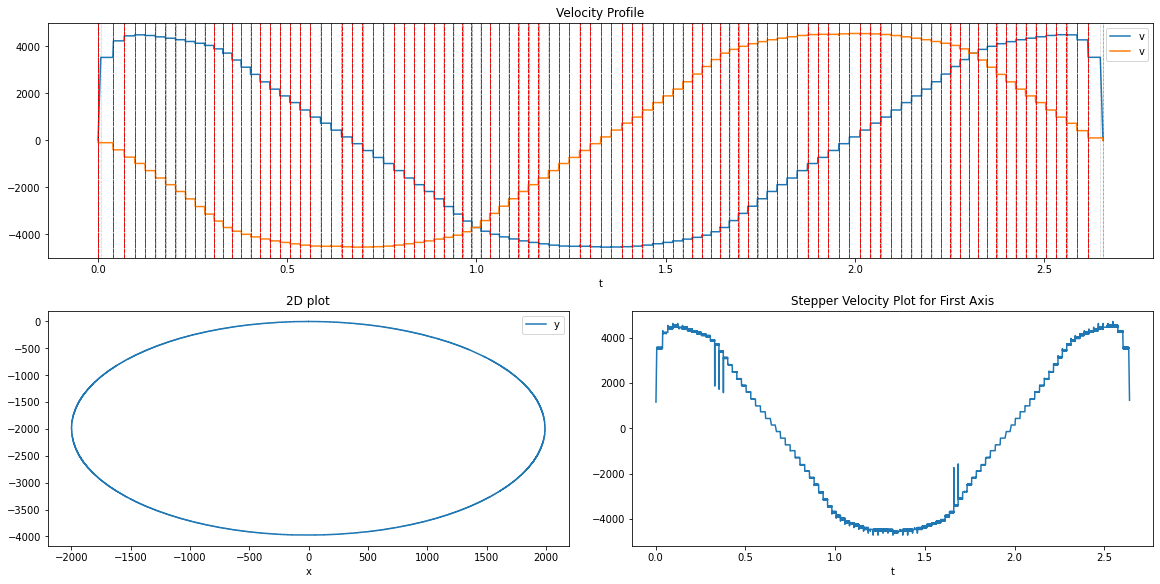

In [15]:
import numpy as np
from IPython.display import Markdown

j = Joint(15_000, 500_000)


def make_circle(j, r=5000, n=100):
    joints = [j] * 2

    sl = SegmentList(joints)
    r = r
    lx = 0
    ly = r
    for i in range(0, n + 1):
        a = 2 * np.pi * (i / n)
        x = sin(a) * r
        y = cos(a) * r

        sl.move((round(x - lx), round(y - ly)))
        lx = x
        ly = y

    t_m = np.mean(list(chain(*[s.times for s in sl])))
    display(Markdown(f"## R={r} N={n} Tmean = {t_m}"))

    #sl.plot();plt.show()
    #fig, ax = plt.subplots(1,figsize=(12,12))
    stepper_plot(sl)
    report(sl)
    return sl


sl = make_circle(j, 2000, 100)
#print(sl.planner_positions, sl.step_positions)

<AxesSubplot:xlabel='t'>

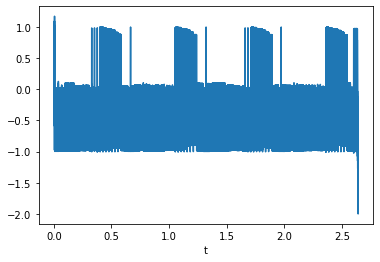

In [16]:
from pytplan.plot import *

df = seg_step_df(sl, details=True)
dfv = step_v_df(sl)
df.xe.plot()

<AxesSubplot:xlabel='t'>

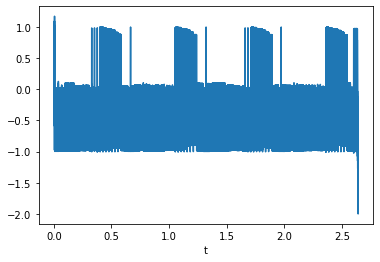

In [17]:
from pytplan.plot import *

df = seg_step_df(sl, details=True)
dfv = step_v_df(sl)
df.xe.plot()

In [18]:
tm = 1.011880
t = df.reset_index()
t = t[t.t.between(tm - .00005, tm + .0005)]
t[t.s != 0]

,t,seg,axis,ph,s,dr,pt,tf,v,a,sl,pl,dl,dc,xc,xe,isdone
505917,1.011836,39,1,2,-1,-1,0.005548,0.023691,-3419.0,0.0,62,4536,0.000292,0.000008,18.968612,0.031388,False
506030,1.012064,39,0,2,-1,-1,0.006192,0.024019,-3872.0,0.0,69,4457,0.000258,0.000004,23.975424,0.024576,False
506063,1.012128,39,1,2,-1,-1,0.005840,0.023691,-3419.0,0.0,61,4463,0.000292,0.000007,19.966960,0.033040,False
506160,1.012324,39,0,2,-1,-1,0.006452,0.024019,-3872.0,0.0,68,4392,0.000258,0.000006,24.982144,0.017856,False


In [19]:
tm = 1.011984
t = t[t.t.between(tm - .00005, tm + .00005)]
t

,t,seg,axis,ph,s,dr,pt,tf,v,a,sl,pl,dl,dc,xc,xe,isdone
505966,1.011936,39,0,2,0,-1,0.006064,0.024019,-3872.0,0.0,70,4489,0.000258,0.000134,23.479808,-0.479808,False
505967,1.011936,39,1,2,0,-1,0.005648,0.023691,-3419.0,0.0,62,4511,0.000292,0.000108,19.310512,-0.310512,False
505968,1.011940,39,0,2,0,-1,0.006068,0.024019,-3872.0,0.0,70,4488,0.000258,0.000138,23.495296,-0.495296,False
505969,1.011940,39,1,2,0,-1,0.005652,0.023691,-3419.0,0.0,62,4510,0.000292,0.000112,19.324188,-0.324188,False
505970,1.011944,39,0,2,0,-1,0.006072,0.024019,-3872.0,0.0,70,4487,0.000258,0.000142,23.510784,-0.510784,False
505971,1.011944,39,1,2,0,-1,0.005656,0.023691,-3419.0,0.0,62,4509,0.000292,0.000116,19.337864,-0.337864,False
505972,1.011948,39,0,2,0,-1,0.006076,0.024019,-3872.0,0.0,70,4486,0.000258,0.000146,23.526272,-0.526272,False
505973,1.011948,39,1,2,0,-1,0.005660,0.023691,-3419.0,0.0,62,4508,0.000292,0.000120,19.351540,-0.351540,False
505974,1.011952,39,0,2,0,-1,0.006080,0.024019,-3872.0,0.0,70,4485,0.000258,0.000150,23.541760,-0.541760,False
505975,1.011952,39,1,2,0,-1,0.005664,0.023691,-3419.0,0.0,62,4507,0.000292,0.000124,19.365216,-0.365216,False


<AxesSubplot:xlabel='v', ylabel='vc'>

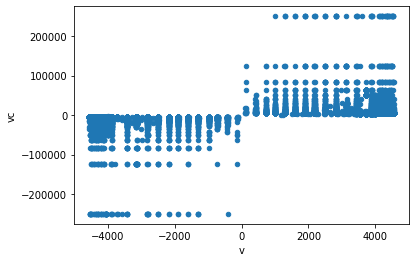

In [20]:
t = df.reset_index()
nz = t[t.s != 0].copy()
nz['vc'] = 1 / (nz.t.diff()) * nz.s
nz['v_err'] = (nz.v - nz.vc)
nz.plot.scatter('v', 'vc')

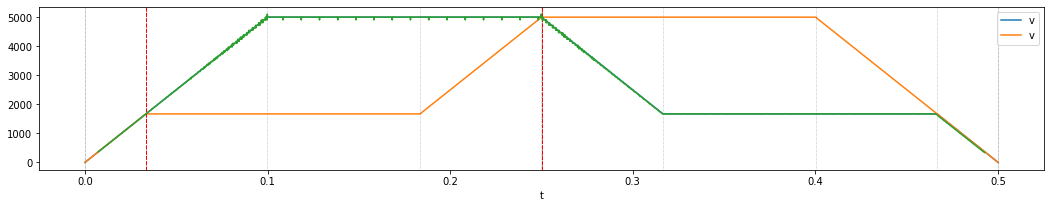

In [21]:
#
# Calculate velocity profile directly from steps
#
j = Joint(5_000, 50_000)
joints = [j] * 2

sl = SegmentList(joints)

x = 1000

sl.move([x, x / 2])
sl.move([x / 2, x])

ax = sl.plot()

step_v_plot(sl)

In [22]:
from pytplan.stepper import *

j = Joint(5_000, 50_000)
joints = [j] * 2

sl = SegmentList(joints)

x = 1000

sl.move([x, x / 2])
sl.move([x / 2, x])
sl.move([x, x / 2])
sl.move([x / 2, x])
sl.move([x, x / 2])
sl.move([x / 2, x])
ss = SegmentStepper(sl, details=True)

l = list(ss)


0
0
0
0
0


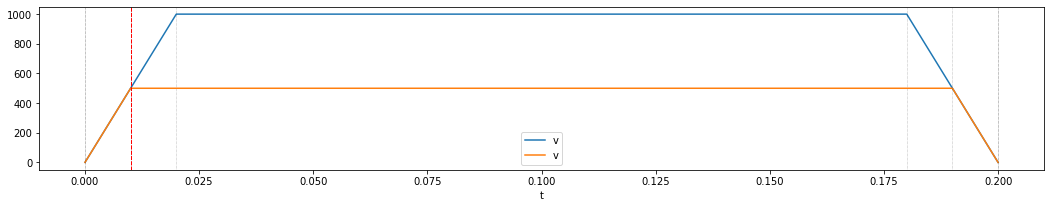

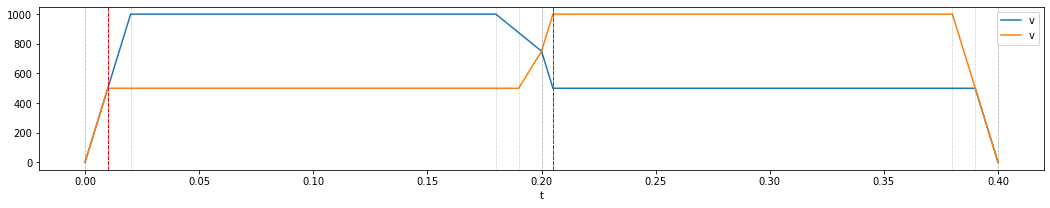

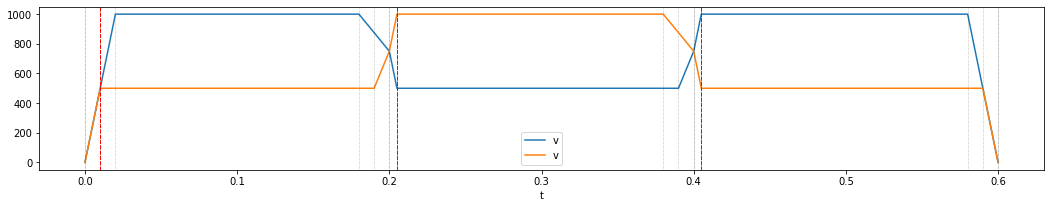

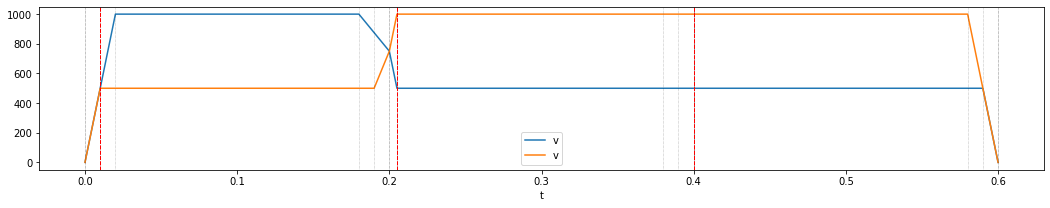

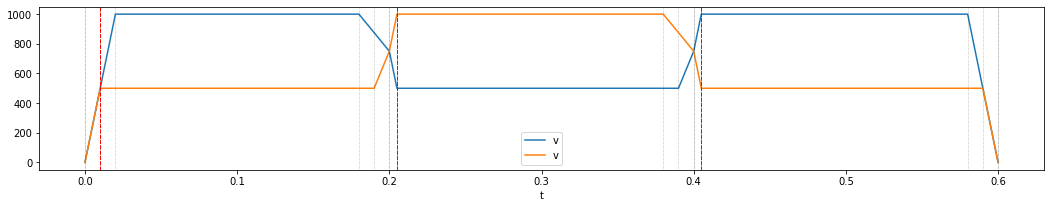

In [23]:
from pytplan.stepper import *

j = Joint(5_000, 50_000)
joints = [j] * 2

sl = SegmentList(joints)

x = 1000

for i in range(5):
    if i % 2 == 0:
        sl.jmove(.2, [x, x / 2])
        print(sl.queue_time)
        sl.plot()
    else:
        sl.jmove(.2, [x / 2, x])
        print(sl.queue_time)
        sl.plot()

In [35]:
from pytplan.stepper import *

j = Joint(5_000, 50_000)
joints = [j] * 2

sl = SegmentList(joints)

x = 1000

sl.move([x, x])

df = seg_step_df(sl, True)

df.head()

,seg,axis,ph,s,dr,pt,tf,v,a,sl,pl,dl,dc,xc,xe,isdone
t,,,,,,,,,,,,,,,,
0.000004,0,0,1,0,1,0.000004,0.10006,0.00000,49940.018,250,25014,1.000000,0.000008,3.995201e-07,-3.995201e-07,False
0.000004,0,1,1,0,1,0.000004,0.10006,0.00000,49940.018,250,25014,1.000000,0.000008,3.995201e-07,-3.995201e-07,False
0.000008,0,0,1,0,1,0.000008,0.10006,0.19976,49940.018,250,25013,5.006005,0.000012,1.598081e-06,-1.598081e-06,False
0.000008,0,1,1,0,1,0.000008,0.10006,0.19976,49940.018,250,25013,5.006005,0.000012,1.598081e-06,-1.598081e-06,False
0.000012,0,0,1,0,1,0.000012,0.10006,0.39952,49940.018,250,25012,2.503003,0.000016,3.595681e-06,-3.595681e-06,False


In [34]:
df.sum()

seg       0.000000e+00
axis      7.499900e+04
ph        3.001900e+05
s         1.996000e+03
dr        1.499980e+05
pt        7.500144e+03
tf        1.501884e+04
v         4.995320e+08
a        -9.688363e+06
sl        2.508731e+07
pl        1.879670e+09
dl        2.361145e+02
dc        5.596938e+01
xc        2.501772e+07
xe       -2.340404e+04
isdone    2.000000e+00
dtype: float64

<AxesSubplot:>

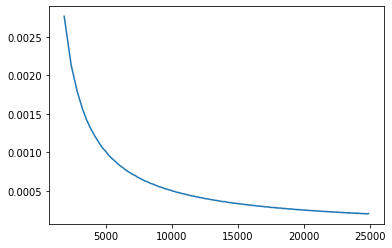

In [40]:

t =df[(df.ph == 1) & (df.axis==0)].reset_index()
t = t[t.s==1].t.diff()
t.plot()

In [39]:
t

,t,seg,axis,ph,s,dr,pt,tf,v,a,sl,pl,dl,dc,xc,xe,isdone
0,0.000004,0,0,1,0,1,0.000004,0.10006,0.000000,49940.018,250,25014,1.000000,0.000008,3.995201e-07,-3.995201e-07,False
1,0.000008,0,0,1,0,1,0.000008,0.10006,0.199760,49940.018,250,25013,5.006005,0.000012,1.598081e-06,-1.598081e-06,False
2,0.000012,0,0,1,0,1,0.000012,0.10006,0.399520,49940.018,250,25012,2.503003,0.000016,3.595681e-06,-3.595681e-06,False
3,0.000016,0,0,1,0,1,0.000016,0.10006,0.599280,49940.018,250,25011,1.668668,0.000020,6.392322e-06,-6.392322e-06,False
4,0.000020,0,0,1,0,1,0.000020,0.10006,0.799040,49940.018,250,25010,1.251501,0.000024,9.988004e-06,-9.988004e-06,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24914,0.099660,0,0,1,0,1,0.099660,0.10006,4976.822434,49940.018,1,100,0.000201,0.000192,2.480050e+02,9.949841e-01,False
24915,0.099664,0,0,1,0,1,0.099664,0.10006,4977.022194,49940.018,1,99,0.000201,0.000196,2.480249e+02,9.750756e-01,False
24916,0.099668,0,0,1,0,1,0.099668,0.10006,4977.221954,49940.018,1,98,0.000201,0.000200,2.480448e+02,9.551663e-01,False
24917,0.099672,0,0,1,0,1,0.099672,0.10006,4977.421714,49940.018,1,97,0.000201,0.000204,2.480647e+02,9.352562e-01,False
